In [1]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re
from re import split

In [2]:
def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]
mlen = 2 # number states
tlen = 3

excludedvids=[1,2,3,4,5,8,9]

In [3]:


def parser_arr_old(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'Processing' in line:
                vidnum = line.split('pp_')[-1]
                vidnum = vidnum.split('.avi')[0]
                vidnum = vidnum.split('_')[0]
                vidnum = int(vidnum)
                #print(vidnum)
                line = textfile.readline()
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word))
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word))
                        except ValueError:
                            pass
                        
                
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        vidnums=[]
                        vidarrs.append([[], vidnums])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                    else:
                        pass    
                    
                    line = textfile.readline()
                    #print('array lives here', line)
                    if '[[' in line:
                        arr = np.zeros((mlen,mlen))
                        #print(arr)
                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[0,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[1,:] = linenums

                        #line = textfile.readline()
                        #print('array lives here', line)   

                        #linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        #arr[2,:] = linenums

                        transitions[-1] += arr
                        vidarrs[-1][0].append(arr)
                        vidarrs[-1][1].append(vidnum)
                        #print(arr,'\n', transitions[-1])
                    else:
                        print("missing array")
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([transitions, np.array(thresholds), vidarrs]) 



In [4]:

cols = [ 'red', 'orange' ]

In [5]:

print(parser_arr_old(glob('./output wash*trans.txt')[0])[2][:])


[[[array([[2., 2.],
       [2., 3.]]), array([[ 6.,  1.],
       [ 0., 28.]]), array([[2., 2.],
       [1., 3.]]), array([[0., 1.],
       [1., 1.]]), array([[1., 2.],
       [2., 4.]]), array([[  2.,   4.],
       [  4., 137.]]), array([[ 2.,  2.],
       [ 3., 34.]]), array([[ 0.,  0.],
       [ 0., 10.]]), array([[0., 1.],
       [1., 7.]]), array([[0., 0.],
       [0., 4.]]), array([[ 0.,  0.],
       [ 0., 13.]]), array([[ 3.,  9.],
       [10., 24.]])], [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]], [[array([[1., 1.],
       [1., 3.]]), array([[ 7.,  1.],
       [ 0., 19.]]), array([[2., 2.],
       [1., 2.]]), array([[0., 1.],
       [1., 1.]]), array([[1., 1.],
       [1., 4.]]), array([[  1.,   4.],
       [  4., 136.]]), array([[ 2.,  2.],
       [ 3., 27.]]), array([[ 0.,  0.],
       [ 0., 14.]]), array([[0., 0.],
       [0., 8.]]), array([[0., 0.],
       [0., 4.]]), array([[ 0.,  0.],
       [ 0., 14.]]), array([[ 4.,  7.],
       [ 8., 26.]])], [0, 1, 10, 11, 2, 3, 4, 5, 6, 7,


len indices 8
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
[[2. 2.]
 [2. 3.]] counts [45. 55.]
[[2. 2.]
 [1. 3.]] counts [37.5 62.5]
[[0. 1.]
 [1. 1.]] counts [25. 75.]
[[0. 1.]
 [1. 7.]] counts [ 6.25 93.75]
[[0. 0.]
 [0. 4.]] counts [  0. 100.]
Total transitions:  33.0 [[ 4.  6.]
 [ 5. 18.]] 

vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
[[1. 1.]
 [1. 3.]] counts [37.5 62.5]
[[2. 2.]
 [1. 2.]] counts [41.66666667 58.33333333]
[[0. 1.]
 [1. 1.]] counts [25. 75.]
[[0. 0.]
 [0. 8.]] counts [  0. 100.]
[[0. 0.]
 [0. 4.]] counts [  0. 100.]
Total transitions:  28.0 [[ 3.  4.]
 [ 3. 18.]] 

vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed 

Text(0, 0.5, 'observed probability of transition')

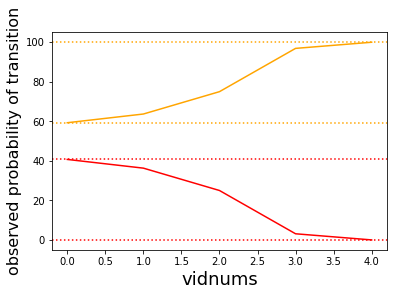

In [6]:
#broad observations array
trans_runs= parser_arr_old(glob('./output wash*trans.txt')[0])
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
    
def col_norm(array):
    cols = array.T
    cols = np.array([ratio(j)*100 for j in cols])
    return cols.T
def row_norm(array):
    rows = np.array([ratio(j)*100 for j in array])
    return rows
    
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    #x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = trans_runs[2][i][1]
        print('vidnums', vidnums)
        allowed_inds = [x for x in range(len(vidnums)) if vidnums[x] not in excludedvids]
        print('disallowed numbers', excludedvids)
        print('disallowed indices', [x for x in range(len(vidnums)) if vidnums[x] in excludedvids])
        print('allowed indices', allowed_inds)
        vidnums = [vidnums[x] for x in allowed_inds]
        print('vidnums filtered', vidnums)
        vidarrs = vidarrs[allowed_inds]   
        vidindices = list(range(len(vidarrs)))
        for vidind in vidindices: 
            T_obb = vidarrs[vidind]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            print(T_obb, 'counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            #x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
        print('Total transitions: ',np.sum(vidarrs), np.sum(vidarrs, axis=0), '\n')
#print(t_threshes,c_threshes)    

# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=0))
y_values_selected = col_norm(y_values_selected)
print('\n','\nsummed y values\n', y_values_selected, '\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2 = y_values_selected 
print('\nvidnums',vidnums,y1,y2)#,y3)
vidnums = list(range(len(y1)))
fig,ax = plt.subplots()
print('\n',len(vidnums), len(y1))        
plt.plot(vidnums, y1, c = cols[0], ls = '-')
plt.plot(vidnums, y2, c = cols[1], ls = '-')
#plt.plot(vidnums, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('vidnums', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0

Text(0, 0.5, 'observed probability of transition')

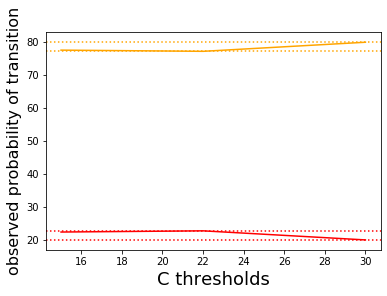

In [7]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    #x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = trans_runs[2][i][1]
    print('vidnums', vidnums)
    allowed_inds = [x for x in range(len(vidnums)) if vidnums[x] not in excludedvids]
    print('disallowed numbers', excludedvids)
    print('disallowed indices', [x for x in range(len(vidnums)) if vidnums[x] in excludedvids])
    print('allowed indices', allowed_inds)
    vidnums = [vidnums[x] for x in allowed_inds]
    print('vidnums filtered', vidnums)
    vidarrs = vidarrs[allowed_inds]   
    vidindices = list(range(len(vidarrs)))
    for vidind in vidindices: 
        T_obb = vidarrs[vidind]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        #x3.append(counts[2])
    if len(x1) == len(vidnums):
        #vidarrs = np.cumsum(vidarrs, axis=0)
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby c threshold
stored_y_values = np.array(stored_y_values)
cs = list(set(c_threshes))
list.sort(cs)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
#y3 = []
for j in cs:
    inds = np.where(np.array(c_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    #y3.append(collected_value_across_all_vids[2])
print(cs,y1,y2)
fig,ax = plt.subplots()
print(len(cs), len(y1))        
plt.plot(cs, y1, c = cols[0], ls = '-')
plt.plot(cs, y2, c = cols[1], ls = '-')
#plt.plot(cs, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('C thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0

Text(0, 0.5, 'observed probability of transition')

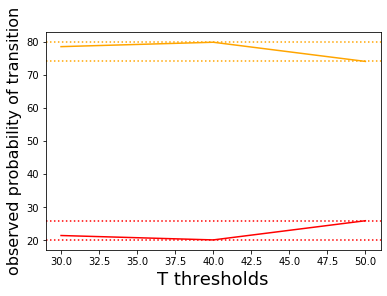

In [8]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = trans_runs[2][i][1]
    print('vidnums', vidnums)
    allowed_inds = [x for x in range(len(vidnums)) if vidnums[x] not in excludedvids]
    print('disallowed numbers', excludedvids)
    print('disallowed indices', [x for x in range(len(vidnums)) if vidnums[x] in excludedvids])
    print('allowed indices', allowed_inds)
    vidnums = [vidnums[x] for x in allowed_inds]
    print('vidnums filtered', vidnums)
    vidarrs = vidarrs[allowed_inds]   
    vidindices = list(range(len(vidarrs)))
    for vidind in vidindices: 
        T_obb = vidarrs[vidind]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        #x3.append(counts[2])
    if len(x1) == len(vidnums):
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby t threshold
stored_y_values = np.array(stored_y_values)
ts = list(set(t_threshes))
list.sort(ts)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
#y3 = []
for j in ts:
    inds = np.where(np.array(t_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    #y3.append(collected_value_across_all_vids[2])
print(ts,y1,y2)
fig,ax = plt.subplots()
print(len(ts), len(y1))        
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
#plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('T thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video


len indices 8
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6, 7]
vidnums [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
disallowed numbers [1, 2, 3, 4, 5, 8, 9]
disallowed indices [1, 4, 5, 6, 7, 10, 11]
allowed indices [0, 2, 3, 8, 9]
vidnums filtered [0, 10, 11, 6

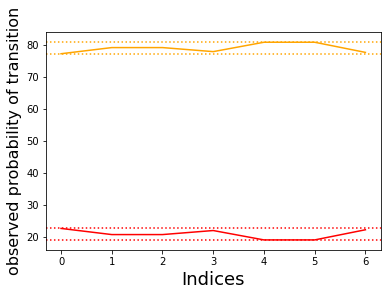

In [9]:
index = list(range(len(trans_runs[0])))
def row_norm(array):
    rows = np.array([ratio(j)*100 for j in array])
    return rows
criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    #x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = trans_runs[2][i][1]
        print('vidnums', vidnums)
        allowed_inds = [x for x in range(len(vidnums)) if vidnums[x] not in excludedvids]
        print('disallowed numbers', excludedvids)
        print('disallowed indices', [x for x in range(len(vidnums)) if vidnums[x] in excludedvids])
        print('allowed indices', allowed_inds)
        vidnums = [vidnums[x] for x in allowed_inds]
        print('vidnums filtered', vidnums)
        vidarrs = vidarrs[allowed_inds]   
        vidindices = list(range(len(vidarrs)))
        for vidind in vidindices: 
            T_obb = vidarrs[vidind]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            #print('counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            #x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2])#,x3])
#print(t_threshes,c_threshes)    
print('criteria', criteria)
# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=2))
print(y_values_selected)
y_values_selected = row_norm(y_values_selected)
print('\n','\nsummed y values\n', y_values_selected, y_values_selected.T,'\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2 = y_values_selected.T 

fig,ax = plt.subplots()
print(len(criteria), len(y1))   
ts = list(range(len(y1)))
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
#plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
#plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
#plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('Indices', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)


v1 = y1
v2 = y2

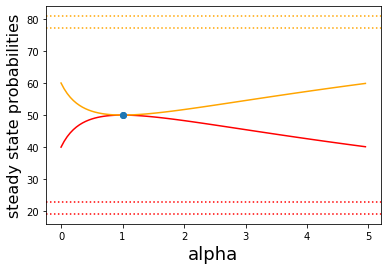

In [10]:
##### "tESTING HYPOTHESIS WITH all 2 positions for particle to swing to"
#narrow observations array
#narrow observations array
alphas = np.linspace(0, 5, 100,endpoint =False)
#betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[4*i, 2*(i + 1)],
     [4, 2*(i+1)]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
#print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, x1, c = cols[0], ls = '-')
plt.plot(alphas, x2, c = cols[1], ls = '-')
#plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
#plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
#plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50,50), 'o')


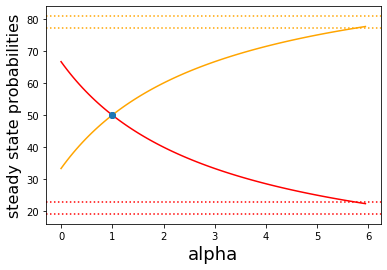

In [11]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 6, 100,endpoint =False)
#betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2, i + 1],
     [4/(i+1), 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
#print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, x1, c = cols[0], ls = '-')
plt.plot(alphas, x2, c = cols[1], ls = '-')
#plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
#plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
#plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50,50), 'o')



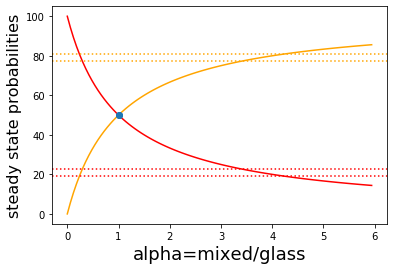

In [12]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 6, 100,endpoint =False)
#betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    t = (2/((1+i)*(2+2*i))+
         4*i/((1+i)*(2+2*i)*(4+2*i))+
          2*i/((1+i)*(4+2*i)))
    #print(bm)
    c = (2*i/((1+i)*(4+2*i))+
          i*(2+2*i)/((1+i)*(4+2*i)))
    
    T_expected_narrow = np.asarray([[t, c],
     [t, c]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
#print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, x1, c = cols[0], ls = '-')
plt.plot(alphas, x2, c = cols[1], ls = '-')
#plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
#plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
#plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha=mixed/glass', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50,50), 'o')



[(19.166666666666668, 22.75), (77.25, 80.83333333333333)]


Text(0.5, 0, 'proprtion of hinge motion')

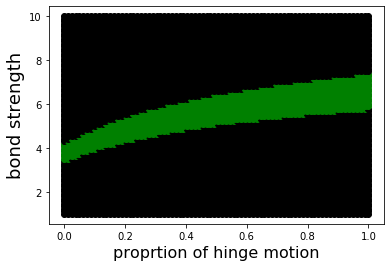

In [24]:
#narrow observations array
fig, ax = plt.subplots()
alphas = np.linspace(1, 10, 80)
ratios = np.linspace(0, 1, 80)
tolerances = [(min(v1), max(v1)), (min(v2), max(v2))]
print(tolerances)


for i in alphas:
    for r in ratios:
        #print('\nalpha = %s' %i)
        #print(tm)
        t = (2/((1+i)*(2+2*i))+
         4*i/((1+i)*(2+2*i)*(4+2*i))+
          2*i/((1+i)*(4+2*i)))
        #print(bm)
        c = (2*i/((1+i)*(4+2*i))+
              i*(2+2*i)/((1+i)*(4+2*i)))

        T2 = np.asarray([[t, c],
         [t, c]])
        T1 = np.asarray([[2, i + 1],
         [4/(i+1), 2]])
        T_expected_narrow = r*T1 + (1-r)*T2
        #print(T_expected_narrow)
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        test = all((evec_one[i]>= tolerances[i][0] and evec_one[i]<= tolerances[i][1])  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(r, i, c=col, marker='o')
plt.ylabel('bond strength', fontsize=18)
plt.xlabel('proprtion of hinge motion', fontsize=16)

In [18]:
def parser_arr(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    timestotrans = []
    statelists = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'Processing' in line:
                vidnum = line.split('pp_')[-1]
                vidnum = vidnum.split('.avi')[0]
                vidnum = vidnum.split('_')[0]
                #print(vidnum)
                vidnum = int(vidnum)
                line = textfile.readline()
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word)) #collect T_treshold
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word)) # colect C_threshold
                        except ValueError:
                            pass
                                          
                    #Initialise collecction arrays for this threshold pair
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        #vidnums=[]
                        vidarrs.append([[] for i in range(3)])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                        #timestotrans.append(np.zeros((tlen,mlen,mlen)))
                        statelists.append([])
                    else:
                        pass    
                    
                    # Collect transition data
                    line = textfile.readline()
                    #print('array lives here', line)
                    trarr = read_square_arr(line, textfile)
                    transitions[-1] += trarr
                    vidarrs[-1][0].append(trarr)
                    vidarrs[-1][1].append(vidnum)
        
                    # Collect time data
                    #print(len(timestotrans[-1]))
                    tiarrs = []
                    for i in range(tlen):
                        line = textfile.readline()
                        #print('array lives there', line)
                        tiarr = read_square_arr_list(line, textfile) 
                        #print(arr)
                        #times += tiarr   
                        #print(times)
                        tiarrs.append(tiarr)
                        line = textfile.readline()
                        print('arr','\n', tiarr)
                    #print("collected 3 rrays: ", tiarrs)
                    vidarrs[-1][2].append(tiarrs)                       
                    # Collect state data 
                    statelists[-1].append([float(f) for f in filter(int_from_text, split(' |\[|]', line))])
                    #print(thresholds[-1])
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([np.array(transitions), np.array(thresholds), np.array(vidarrs), np.array(timestotrans), statelists]) 

def int_from_text(text):
    try:
        float(text)
        return True
    except:
        return False
    
def int_from_text_list(textlist):
    #print('textlist: ', textlist)
    elements = []
    for el in textlist:
        nums = [int(s) for s in  re.findall(r'\d+',el)]
        elements.append(nums)
        #print("nums for element ",el,": ", nums )
    #print('elements total: ', elements)
    return elements
    
def read_square_arr(line, textfile):
    if '[[' in line:
        arr = np.zeros((mlen,mlen))
        #print(split(' |\[|]', line))
        linenums = [float(f) for f in filter(int_from_text, split(' |\[|]', line))]
        #print(linenums)
        arr[0,:] = linenums

        line = textfile.readline()
        #print('array lives here', line)           
        linenums = [float(f) for f in filter(int_from_text, split(' |\[|]', line))]
        #print(linenums)
        arr[1,:] = linenums

        return(arr)
        #print(arr,'\n', transitions[-1])
    else:
        print("missing trans array")
sttr = '\[*list'
def read_square_arr_list(line, textfile):
    #print('square array start: ', line)
    if '[[' in line:
        arr =[]
        
        while ')]' not in line:
            line2 = textfile.readline()
            line += line2
            #print('LINE', line)           
            
        prelims = [x for x in split(sttr , line.replace('\n', '')) if re.match('\S', x)]
        #print(prelims)
        linenums = int_from_text_list(prelims)
        #print(linenums)
        arr.append(linenums)

        line = textfile.readline()        
        while ')]' not in line:
            line2 = textfile.readline()
            line += line2
            #print('LINE', line)   
            
        prelims = [x for x in split(sttr , line.replace('\n', '')) if re.match('\S', x)]
        #print(prelims)
        linenums = int_from_text_list(prelims)
        #print(linenums)
        arr.append(linenums)

        return(np.array(arr))
        #print(arr,'\n')
    else:
        print("missing times array")

In [20]:
print(glob('./output wash*tra*_regime.txt')[0])
print(parser_arr(glob('./output wash*tra*_regime_2.txt')[0]))

.\output washedtrans_regime.txt
arr 
 [[list([91, 619]) list([9041])]
 [list([586]) list([1388, 494, 297, 558])]]
arr 
 [[list([0, 43]) list([8509])]
 [list([451]) list([461, 147, 0, 183])]]
arr 
 [[list([91, 576]) list([532])]
 [list([135]) list([927, 347, 297, 375])]]
arr 
 [[list([481, 462, 137, 643, 202, 207, 189, 430]) list([773])]
 [list([])
  list([395, 863, 223, 726, 1796, 1581, 288, 1580, 803, 651, 934, 285, 704, 145, 719, 1161, 1054, 461, 529, 477, 244, 1165])]]
arr 
 [[list([34, 0, 8, 549, 14, 127, 95, 276]) list([303])]
 [list([])
  list([7, 547, 89, 531, 180, 1, 109, 1116, 537, 159, 844, 146, 161, 0, 623, 761, 830, 391, 439, 274, 98, 868])]]
arr 
 [[list([447, 462, 129, 94, 188, 80, 94, 154]) list([470])]
 [list([])
  list([388, 316, 134, 195, 1616, 1580, 179, 464, 266, 492, 90, 139, 543, 145, 96, 400, 224, 70, 90, 203, 146, 297])]]
arr 
 [[list([2702, 160]) list([1193, 4232])]
 [list([3097]) list([1046, 6191, 1250])]]
arr 
 [[list([0, 76]) list([843, 2531])]
 [list([2194]

In [21]:
# GEt regime of transitions
#parser_arr(glob('./timestotrans.txt')[0])
def flattener(array_of_lists):
    return(np.array([x for y in array_of_lists for x in y]))

trans_runs= parser_arr(glob('./output wash*tra*_regime_2.txt')[0])
reduced_times = dict()
t_threshes = []
c_threshes = []    
index = list(range(len(trans_runs[0])))

vidnumset = []
print('\nlen indices', len(index))
for i in index:
    #xs_tr = []
    #xs_ti = []
    trans_matrices = []
    times_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    #print(np.shape(trans_runs[2]))
    transarrs = np.array(trans_runs[2][i][0])
    timarrs = np.array(trans_runs[2][i][2]) ##########
    vidnums = trans_runs[2][i][1]
    print('vidnums', vidnums)
    allowed_inds = [x for x in range(len(vidnums)) if vidnums[x] not in excludedvids]
    print('disallowed numbers', excludedvids)
    print('disallowed indices', [x for x in range(len(vidnums)) if vidnums[x] in excludedvids])
    print('allowed indices', allowed_inds)
    vidnums = [vidnums[x] for x in allowed_inds]
    print('vidnums filtered', vidnums)
    transarrs = transarrs[allowed_inds]
    timarrs = timarrs[allowed_inds]
    #print(row_norm(vidarrs))
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidindices = list(range(len(transarrs)))
    #print(vidnums)
    for vidindex in vidindices: 
        Tr_obb = transarrs[vidindex]
        trans_matrices.append(Tr_obb)
        #print('Transitions ob', Tr_obb)
        Ti_obb = timarrs[vidindex] ##################
        times_matrices.append(Ti_obb)
        #print('Times ob', Ti_obb)
    #print("\nTransitions", trans_matrices)
    #print("\n\nTimes", times_matrices)
    t_threshes.append(trans_threshes[0])
    c_threshes.append(trans_threshes[1])
    

    
    #print(len(times_matrices), len(times_matrices[0]))
    #print(np.shape(times_matrices[0][0]))
    timestotrans = np.array(times_matrices)
    print('tt_shape', np.shape(timestotrans))
    #print(type(timestotrans))
    timestotrans = np.moveaxis(timestotrans, [0,1,2,3], [3, 0,1,2])
    print('tt_shape', np.shape(timestotrans))
    #print(timestotrans[0], '\n\n',type(timestotrans[0][0][0]), timestotrans[0][0][0], [x for y in timestotrans[0][0][0] for x in y])
    indices = np.shape(timestotrans)
    #print(len(indices))
    reduced_timestotrans = np.empty(indices[0:-2], dtype = object)
    #print(reduced_timestotrans)
    for m in range(indices[0]):
        time = timestotrans[m]
        for j in range(indices[1]):
            fromrow = time[j]
            collector = []
            for k in range(indices[2]):
                tocolumn = fromrow[k]
                #print("TOCOLUMN", tocolumn)
                tocolumn = np.array(flattener(tocolumn))
                #print("flattened", tocolumn)
                
                collector.extend(tocolumn)
            if collector ==[]: #if there's nothing in a ROW
                reduced_timestotrans[m,j]= collector# [np.nan] # set the from row
            else:
                reduced_timestotrans[m,j] = collector
            #print('timesrow',reduced_timestotrans[m,j] )
    #timestotrans = np.concatenate(timestotrans, axis=-1)
    print('SHAPE', np.shape(reduced_timestotrans))
    print('reduced', reduced_timestotrans[0])
    print('len of rows per time ', [[len(i) for i in x] for x in reduced_timestotrans])
    print(len([x for y in np.ravel(timestotrans) for x in y]), len([i for x in np.ravel(reduced_timestotrans) for i in x]))
    reduced_times[i] = reduced_timestotrans
    #reduced_timestotrans = per time, pper origin, list of transitions times
    


arr 
 [[list([91, 619]) list([9041])]
 [list([586]) list([1388, 494, 297, 558])]]
arr 
 [[list([0, 43]) list([8509])]
 [list([451]) list([461, 147, 0, 183])]]
arr 
 [[list([91, 576]) list([532])]
 [list([135]) list([927, 347, 297, 375])]]
arr 
 [[list([481, 462, 137, 643, 202, 207, 189, 430]) list([773])]
 [list([])
  list([395, 863, 223, 726, 1796, 1581, 288, 1580, 803, 651, 934, 285, 704, 145, 719, 1161, 1054, 461, 529, 477, 244, 1165])]]
arr 
 [[list([34, 0, 8, 549, 14, 127, 95, 276]) list([303])]
 [list([])
  list([7, 547, 89, 531, 180, 1, 109, 1116, 537, 159, 844, 146, 161, 0, 623, 761, 830, 391, 439, 274, 98, 868])]]
arr 
 [[list([447, 462, 129, 94, 188, 80, 94, 154]) list([470])]
 [list([])
  list([388, 316, 134, 195, 1616, 1580, 179, 464, 266, 492, 90, 139, 543, 145, 96, 400, 224, 70, 90, 203, 146, 297])]]
arr 
 [[list([2702, 160]) list([1193, 4232])]
 [list([3097]) list([1046, 6191, 1250])]]
arr 
 [[list([0, 76]) list([843, 2531])]
 [list([2194]) list([379, 6072, 0])]]
arr 
 [

Times: 
means,  [3259.0, 2238.0]
vaars,  [11043501.0, 8867960.0]
[list([91, 619, 2702, 160, 9041, 1193, 4232, 8032])
 list([586, 3097, 2853, 1388, 494, 297, 558, 1046, 6191, 1250, 1582, 4643, 102, 311, 722, 5225, 1083, 495, 2961, 715, 13882, 739, 1245])] 

means,  [2415.0, 1637.0]
vaars,  [10804056.0, 9567312.0]
[list([0, 43, 0, 76, 8509, 843, 2531, 7319])
 list([451, 2194, 2358, 461, 147, 0, 183, 379, 6072, 0, 310, 4566, 38, 193, 608, 4694, 62, 3, 342, 264, 13784, 37, 508])] 

means,  [844.0, 600.0]
vaars,  [720198.0, 319353.0]
[list([91, 576, 2702, 84, 532, 350, 1701, 713])
 list([135, 903, 495, 927, 347, 297, 375, 667, 119, 1250, 1272, 77, 64, 118, 114, 531, 1021, 492, 2619, 451, 98, 702, 737])] 

MAX 13784
BINS [0.0, 1723.0, 3446.0, 5169.0, 6892.0, 8615.0, 10338.0, 12061.0, 13784.0]
MAX 13784
BINS [0.0, 172.25, 344.5, 516.75, 689.0, 861.25, 1033.5, 1205.75, 1378.0]


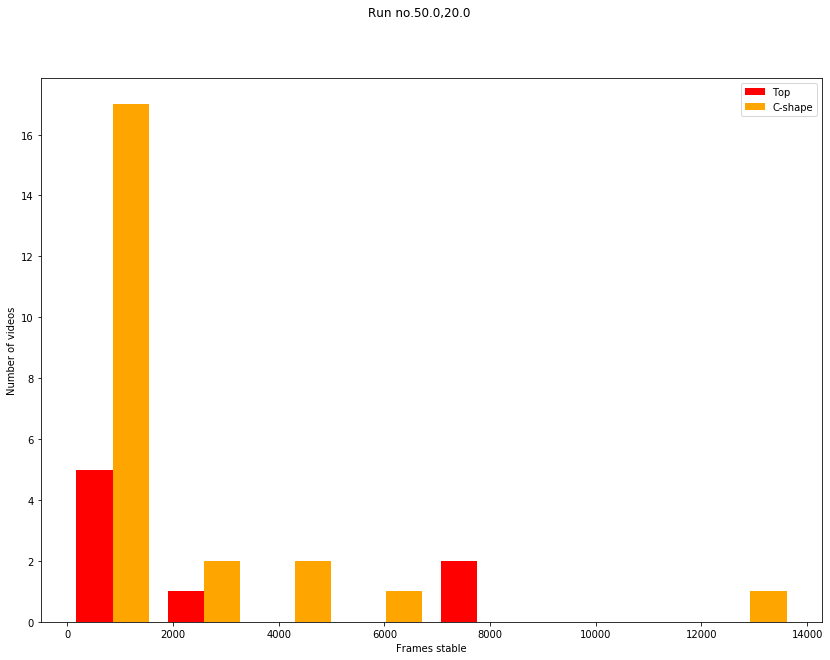

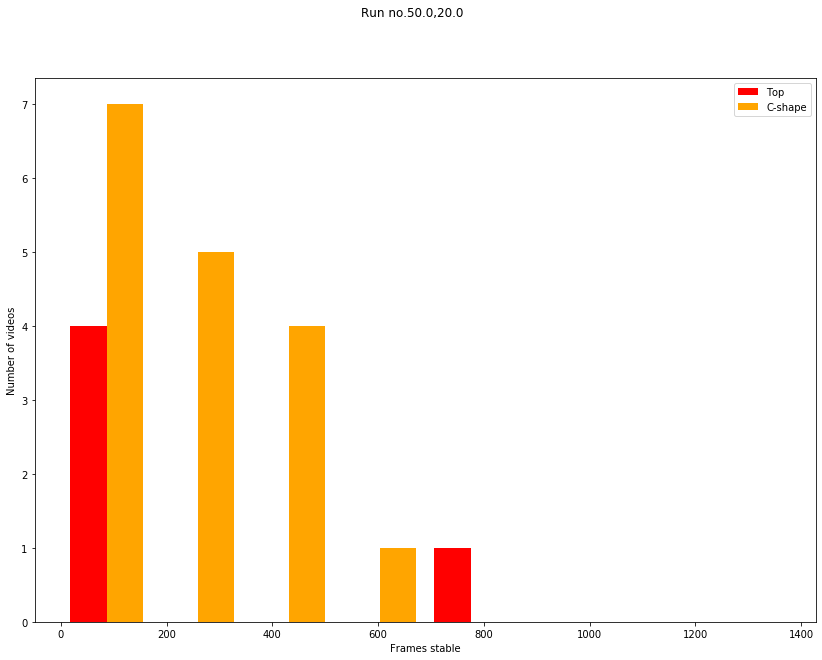

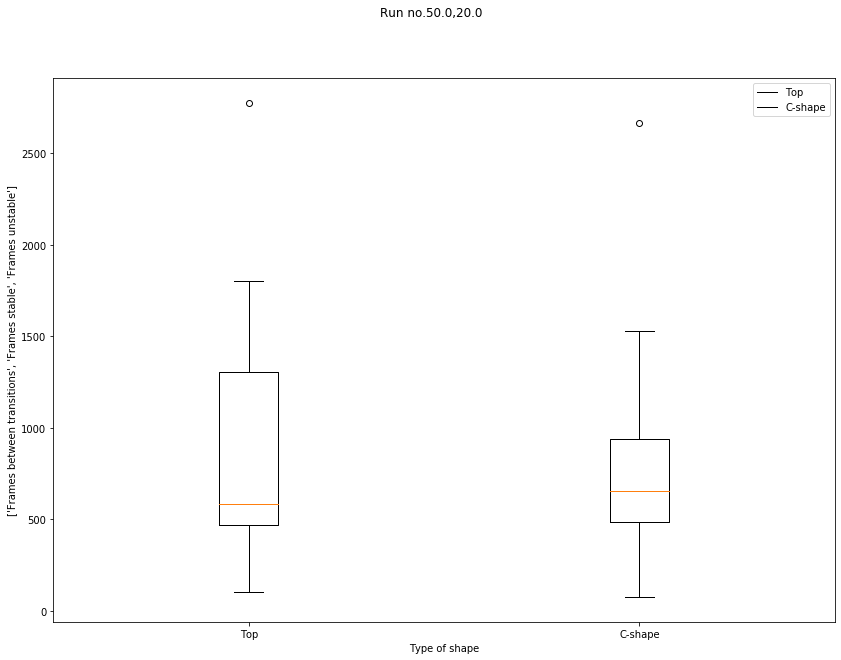

In [35]:
labels = ["Top", "C-shape"]

def binnerseq(seq, nbins, discardfrac):
    maximum = np.nanmax([x for y in seq for x in y])
    print('MAX', maximum)
    rang = maximum
    bins = list(np.linspace(0, np.round(maximum/discardfrac), nbins-1))
    #bins.append(maximum) 
    print('BINS', bins)
    return np.array(bins)
    

for i in index[0:1]:    
    total_time = (reduced_times[i])[0]
    stable_time= (reduced_times[i])[1]
    unstable_time= (reduced_times)[i][2]
    #print(stable_time.T)
    # for each time, separate the three axes
    times = [total_time, stable_time, unstable_time]
    print("Times: ")
    for i in times:
        print('means, ',[np.round(np.nanmean(x)) for x in i])        
        print('vaars, ',[np.round(np.nanvar(x)) for x in i])
        print(i, '\n')
    timenames = ["Frames between transitions", "Frames stable", "Frames unstable"]
    time = times[1]
    timename = timenames[1]
    #times, timenames = times[1:2], timenames[1:2]
    
    
    fig, ax = plt.subplots(figsize = (14, 10))
    fig.suptitle("Run no." + str(trans_threshes[0]) + "," + str(trans_threshes[1]))   
    ax.set_prop_cycle(color=cols)
    ax.hist(time, bins=binnerseq(time,  10, 1))######
    ax.set_xlabel(timename)
    ax.set_ylabel("Number of videos")
    ax.legend(labels)
    
    fig, ax = plt.subplots(figsize = (14, 10))
    fig.suptitle("Run no." + str(trans_threshes[0]) + "," + str(trans_threshes[1]))   
    ax.set_prop_cycle(color=cols)
    ax.hist(time, bins=binnerseq(time,  10, 10))######
    ax.set_xlabel(timename)
    ax.set_ylabel("Number of videos")
    ax.legend(labels)
    
    
    fig, ax = plt.subplots( figsize = (14, 10))
    fig.suptitle("Run no." + str(trans_threshes[0]) + "," + str(trans_threshes[1]))  
    ax.set_prop_cycle(color=cols)
    ax.boxplot(measure, labels = labels)####
    ax.set_ylabel(timenames)
    ax.set_xlabel("Type of shape")
    ax.legend(labels)